# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan:
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [3]:
# drop data yang tidak diperlukan perlu
data=data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


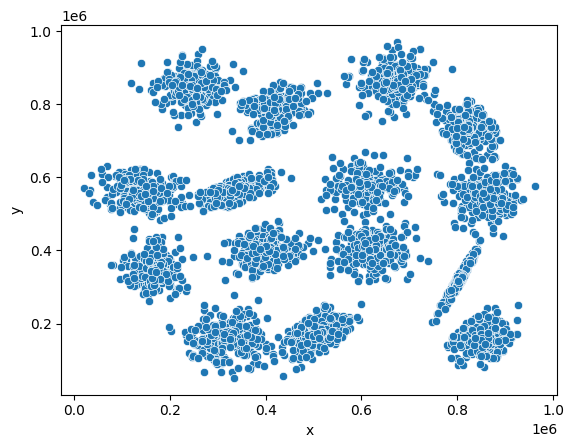

In [4]:
# lakukan Visualisasi
# kita plot biar datanya terlihat

%matplotlib inline
sns.scatterplot(data = data,
            x = 'x',
            y = 'y')
plt.show()

### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

In [5]:
# lakukan Proses Pencarian CLuster terbaik untuk data diatas

# START CODE
# buat fungsi klaster sebanyak n dan rekap hasilnya
def bestCluster(DataFrame, nClus = 1):
  recapKMeans = []

  for i in range(3, nClus): # untuk menghindari error, n terkecil adalah 3
    km = cluster.KMeans(n_clusters=i, random_state=42)
    km.fit(DataFrame)
    recapKMeans.append(km)

  return np.array(recapKMeans)

# END CODE

In [10]:
# lengkapi Code di bawah ini sehingga menghasilkan evaluasi jumlah cluster terbaik
# contoh pemanggilan Library CLustering
# from sklearn.cluster import KMeans

# START CODE
allK = bestCluster(data, 30) # misal, pencarian k sampai 25
#END CODE

In [11]:
# cetak cluster dengan k terbaik
for i in range(len(allK)):
  score = silhouette_score(data, allK[i].labels_)
  print(f"Silhouette score untuk K = {allK[i].n_clusters} (index ke-{i}) adalah: ", score.round(3))

Silhouette score untuk K = 3 (index ke-0) adalah:  0.415
Silhouette score untuk K = 4 (index ke-1) adalah:  0.445
Silhouette score untuk K = 5 (index ke-2) adalah:  0.464
Silhouette score untuk K = 6 (index ke-3) adalah:  0.499
Silhouette score untuk K = 7 (index ke-4) adalah:  0.528
Silhouette score untuk K = 8 (index ke-5) adalah:  0.567
Silhouette score untuk K = 9 (index ke-6) adalah:  0.583
Silhouette score untuk K = 10 (index ke-7) adalah:  0.599
Silhouette score untuk K = 11 (index ke-8) adalah:  0.614
Silhouette score untuk K = 12 (index ke-9) adalah:  0.637
Silhouette score untuk K = 13 (index ke-10) adalah:  0.667
Silhouette score untuk K = 14 (index ke-11) adalah:  0.69
Silhouette score untuk K = 15 (index ke-12) adalah:  0.711
Silhouette score untuk K = 16 (index ke-13) adalah:  0.688
Silhouette score untuk K = 17 (index ke-14) adalah:  0.662
Silhouette score untuk K = 18 (index ke-15) adalah:  0.639
Silhouette score untuk K = 19 (index ke-16) adalah:  0.608
Silhouette scor

Dari percobaan K-means Clustering di atas, diperoleh jumlah k terbaik adalah ketika k sama dengan 15, dengan perolehan **Silhouette Score sebesar 71.12%**.

## Proses Visualisasi hasil CLuster

In [12]:
#Proses Visualisasi hasil cluster

#Pertama, masukkan dahulu label hasil clustering ke dalam data

result = data.copy()

#START CODE
result['cluster'] = allK[12].predict(data)
result.head()
#END CODE

,x,y,cluster
0,664159,550946,5
1,665845,557965,5
2,597173,575538,5
3,618600,551446,5
4,635690,608046,5


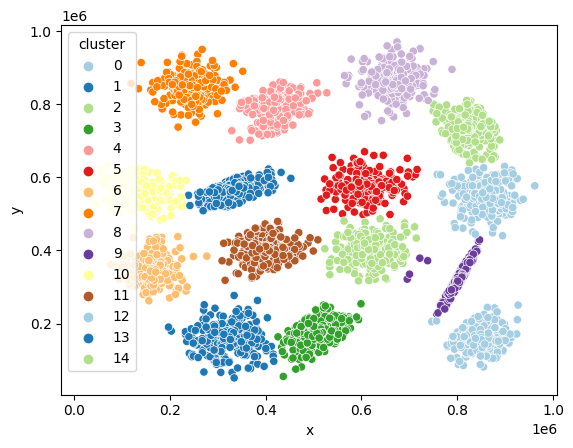

In [13]:
#Lakukan Plotting terhadap data
import seaborn as sns

#Gunakan library seaborn, lebih mudah.

#START CODE
sns.scatterplot(data = result,
            x = 'x',
            y = 'y',
            hue = 'cluster',
            palette = 'Paired')
# sns.relplot(x='x', y='y', hue='cluster', data=result, palette='viridis')
plt.show()
#END CODE